In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from processing_functions import *

df = pd.read_csv('SpeedDatingData.csv', encoding='latin1')

Let's start by changing the empty spaces by nan values to have a clear image of the dataset. Since most of these columns have '?' as the nan value, they  have mismatched datatypes, being objects where they should be ints or floats.
Therefore I decided to create a function to change the column to its corresponding datatype.

In [29]:
df.applymap(convert_to_numeric).replace('?', np.nan, inplace=True)

In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

Check percentage of nan values per column. To make life easier I decided to define a function to return the corresponding percentage for each column.

In [31]:
nan_percentage(df) 
# will probably delete some rows if the provided information is null

NaN % iid: 0.00%
NaN % id: 0.01%
NaN % gender: 0.00%
NaN % idg: 0.00%
NaN % condtn: 0.00%
NaN % wave: 0.00%
NaN % round: 0.00%
NaN % position: 0.00%
NaN % positin1: 22.03%
NaN % order: 0.00%
NaN % partner: 0.00%
NaN % pid: 0.12%
NaN % match: 0.00%
NaN % int_corr: 1.89%
NaN % samerace: 0.00%
NaN % age_o: 1.24%
NaN % race_o: 0.87%
NaN % pf_o_att: 1.06%
NaN % pf_o_sin: 1.06%
NaN % pf_o_int: 1.06%
NaN % pf_o_fun: 1.17%
NaN % pf_o_amb: 1.28%
NaN % pf_o_sha: 1.54%
NaN % dec_o: 0.00%
NaN % attr_o: 2.53%
NaN % sinc_o: 3.43%
NaN % intel_o: 3.65%
NaN % fun_o: 4.30%
NaN % amb_o: 8.62%
NaN % shar_o: 12.84%
NaN % like_o: 2.98%
NaN % prob_o: 3.80%
NaN % met_o: 4.60%
NaN % age: 1.13%
NaN % field: 0.75%
NaN % field_cd: 0.98%
NaN % undergra: 41.35%
NaN % mn_sat: 62.60%
NaN % tuition: 57.23%
NaN % race: 0.75%
NaN % imprace: 0.94%
NaN % imprelig: 0.94%
NaN % from: 0.94%
NaN % zipcode: 12.70%
NaN % income: 48.93%
NaN % goal: 0.94%
NaN % date: 1.16%
NaN % go_out: 0.94%
NaN % career: 1.06%
NaN % career_c: 1

During the experiment they devided the speed dating events in three steps. First step consisted on asking the participants questions based on their initial thoughts on the selected attributes, how they perceive themselves, how they perceive the others, what is the most important attribute, etc.Since I will be only be taking into account first impressions (simulating a dating app) I will remove the data observed after the dates themselves.(explain the column names and why the selected ones for this case are) 

In [32]:
filtered_columns = [
    col for col in df.columns if not col.endswith('_2') 
    and not col.endswith('_3')
    and not col.endswith('_s')
]
# Select only the filtered columns
df_filtered = df[filtered_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 111 entries, iid to them_cal
dtypes: float64(90), int64(13), object(8)
memory usage: 7.1+ MB


Now we have in total 111 columns that center more around the actual dates
I am going to rename the columns associated to rankings to have a clear 
understanding of which is which isntead of having it associated with numbers

In [43]:
rename_suffix = [
    ('1_1', '_important'),
    ('2_1', '_o_want'),
    ('3_1', '_self'),
    ('4_1', '_fellow_want'),
    ('5_1', '_perceived')
]

df_renamed = rename_columns(df_filtered, rename_suffix)
columns = df_renamed.columns
columns.to_list()

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr_important',
 'sinc_important',
 'intel_important',
 'fun_important',
 'amb_important',
 'shar_important',
 'attr_fellow_want',
 'sinc_fellow_want',
 'intel_fellow_want',
 'fun_fellow_want',
 'amb_fellow_want',
 'shar_fellow_want',


Since 'field' has too many unique values, we'll drop it. It is not that important either for this research

In [34]:
#df_renamed['field'].value_counts(normalize=True) 
df_renamed.drop(columns='field')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun,amb,shar,like,prob,met,match_es,length,you_call,them_cal
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,6.0,5.0,7.0,6.0,2.0,4.0,2.0,1.0,1.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,8.0,5.0,6.0,7.0,5.0,1.0,4.0,2.0,1.0,1.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,8.0,5.0,7.0,7.0,NaN,1.0,4.0,2.0,1.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,6.0,8.0,7.0,6.0,2.0,4.0,2.0,1.0,1.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,6.0,6.0,6.0,6.0,2.0,4.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,5.0,NaN,NaN,2.0,5.0,0.0,3.0,1.0,2.0,0.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,4.0,4.0,NaN,4.0,4.0,0.0,3.0,1.0,2.0,0.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,8.0,NaN,6.0,5.0,0.0,3.0,1.0,2.0,0.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,4.0,NaN,5.0,5.0,5.0,0.0,3.0,1.0,2.0,0.0


In some of the waves they implement a different way of rating by attributes:


Waves 6-9: rate the importance of the attributes in a potential date on a scale of 1-10 (1 = not at all important, 10 = extremely important):


Waves 1-5, 10-21: 100 pointsareo distributde among thg attribute,  more pointsare given  to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.

In order to have more objective ratings, I decided to design a function that would change the 100 points ranking system for the importance rating in a scale from 1 to 6.


In [51]:
def attribute_ranking(row, attribute_columns, wave_column, scale_min=1, scale_max=10):
    """
    Scales attribute points directly in the original columns based on specified conditions.
    
    Parameters:
    - row: The row of the DataFrame being processed.
    - attribute_columns: List of columns containing attribute points to be scaled.
    - wave_column: The column to check for the specified condition.
    - scale_min, scale_max: The minimum and maximum of the new scale (default 1 to 10).
    
    Returns:
    - A modified row with scaled attributes if conditions are met.
    """
    # Check if the 'wave' column's value is within the specified ranges
    if row[wave_column] in list(range(1, 6)) + list(range(10, 22)):
        for col in attribute_columns:
            # Scale the attribute directly, updating the original column value
            row[col] = round(((row[col] / 100) * (scale_max - scale_min)) + scale_min, 2)
    return row

# Columns containing attributes to scale
attribute_columns = [
    'attr_important',
    'sinc_important',
    'intel_important',
    'fun_important',
    'amb_important',
    'shar_important',
    'attr_fellow_want',
    'sinc_fellow_want',
    'intel_fellow_want',
    'fun_fellow_want',
    'amb_fellow_want',
    'shar_fellow_want',
    'attr_o_want',
    'sinc_o_want',
    'intel_o_want',
    'fun_o_want',
    'amb_o_want',
    'shar_o_want',
]

df_scaled = df_renamed.apply(lambda row: attribute_ranking(row, attribute_columns, 'wave'), axis=1)

print(df_scaled[attribute_columns])
print(df_renamed[attribute_columns])

      attr_important  sinc_important  intel_important  fun_important  \
0               2.35             2.8             2.80           2.35   
1               2.35             2.8             2.80           2.35   
2               2.35             2.8             2.80           2.35   
3               2.35             2.8             2.80           2.35   
4               2.35             2.8             2.80           2.35   
...              ...             ...              ...            ...   
8373            7.30             1.0             2.35           2.35   
8374            7.30             1.0             2.35           2.35   
8375            7.30             1.0             2.35           2.35   
8376            7.30             1.0             2.35           2.35   
8377            7.30             1.0             2.35           2.35   

      amb_important  shar_important  attr_fellow_want  sinc_fellow_want  \
0              2.35            2.35               NaN       

## Plots

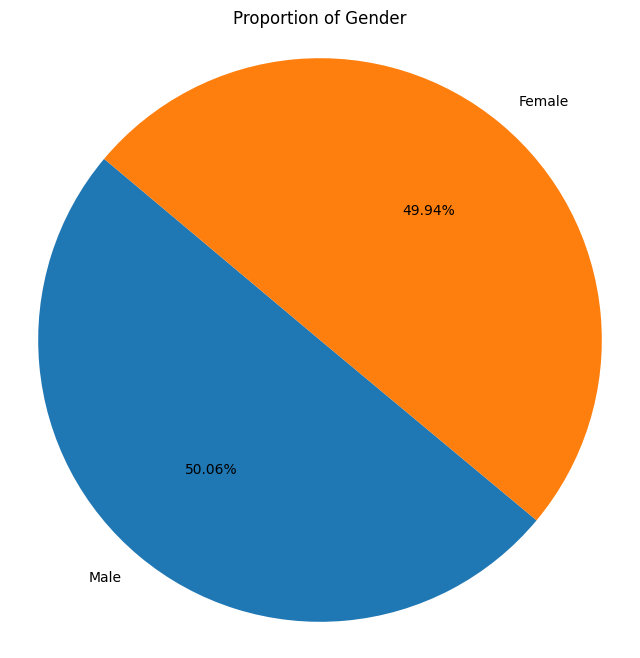

In [41]:
## Gender
gender_counts = df_renamed['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%.2f%%', startangle=140)
plt.title('Proportion of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()